In [102]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import numpy as np

In [103]:
# Caminho para o arquivo CSV com texto pré-processado
cleaned_file_path = r"C:\Users\rebec\OneDrive\Documentos\tweets_cleaned.csv"

In [104]:
# Leitura do arquivo CSV com texto pré-processado
try:
    tweets_df = pd.read_csv(cleaned_file_path)
except FileNotFoundError:
    print(f"Erro: Arquivo '{cleaned_file_path}' não encontrado.")
    exit()

In [105]:
# Listas de palavras-sementes para cada ideologia
populist_words = ['elite', 'people', 'corrupt', 'establishment', 'common', 'folk', 'masses', 'grassroots', 'voice', 'ordinary', 'citizen', 'democracy', 'power']
nativist_words = ['immigrant', 'foreign', 'border', 'nationalism', 'patriotism', 'culture', 'heritage', 'homeland', 'native', 'tradition', 'identity', 'sovereignty']
authoritarian_words = ['law', 'order', 'control', 'power', 'strong', 'leader', 'authority', 'force', 'security', 'discipline', 'rule', 'command', 'regime']

In [106]:
# Função para contar palavras-chave
def count_keywords(text, keywords):
    return sum([text.lower().count(word) for word in keywords])

In [107]:
# Aplicação da contagem de palavras-chave para cada ideologia
tweets_df['Populist Words'] = tweets_df['Cleaned Text'].apply(lambda x: count_keywords(x, populist_words))
tweets_df['Nativist Words'] = tweets_df['Cleaned Text'].apply(lambda x: count_keywords(x, nativist_words))
tweets_df['Authoritarian Words'] = tweets_df['Cleaned Text'].apply(lambda x: count_keywords(x, authoritarian_words))

In [108]:
# Criação de uma matriz de características com base nas contagens de palavras-chave
features = tweets_df[['Populist Words', 'Nativist Words', 'Authoritarian Words']].values

In [109]:
# Clusterização usando KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(features)

C:\Users\rebec\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [110]:
# IMPORTANTE: Cálculo das métricas de avaliação
## A coesão e separação são métricas cruciais para avaliar a qualidade dos clusters formados por algoritmos de agrupamento (Spadini, 2017)
silhouette_avg = silhouette_score(features, clusters)
davies_bouldin_avg = davies_bouldin_score(features, clusters)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.3f}")

Silhouette Score: 0.931
Davies-Bouldin Index: 0.541


In [111]:
# Componentes principais e os rótulos de cluster ao DataFrame
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
tweets_df['PCA1'] = principal_components[:, 0]
tweets_df['PCA2'] = principal_components[:, 1]
tweets_df['Cluster'] = clusters

In [112]:
# Rótulos baseados em nativismo, populismo e autoritarismo
cluster_labels = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3'
}

In [113]:
# Cálculo da matriz de distâncias entre os termos
term_matrix = [populist_words, nativist_words, authoritarian_words]
term_distances = euclidean_distances(features.T)

In [114]:
#  Matriz de distâncias
print("Matriz de Distâncias entre os Termos:")
print(pd.DataFrame(term_distances, index=['Populist', 'Nativist', 'Authoritarian'], columns=['Populist', 'Nativist', 'Authoritarian']))

Matriz de Distâncias entre os Termos:
                Populist   Nativist  Authoritarian
Populist        0.000000  31.685959      38.807216
Nativist       31.685959   0.000000      27.313001
Authoritarian  38.807216  27.313001       0.000000


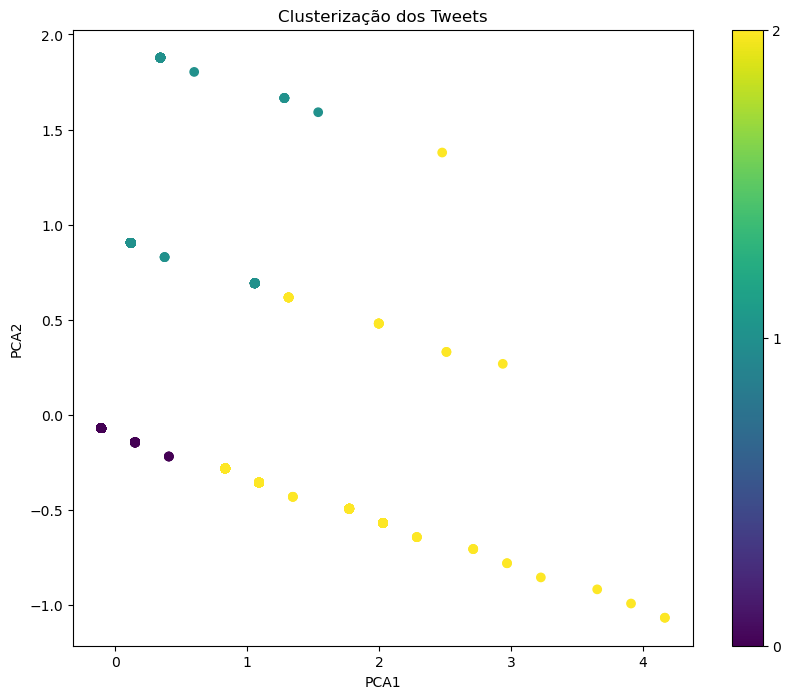

In [92]:
# Plot dos clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tweets_df['PCA1'], tweets_df['PCA2'], c=tweets_df['Cluster'], cmap='viridis')

plt.title('Clusterização dos Tweets')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(scatter, ticks=[0, 1, 2])

In [93]:
# Dados de tweets e clusterização
np.random.seed(0)
features = np.random.rand(100, 10)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

In [94]:
# Rótulos de cluster atribuídos
np.random.seed(0)
tweets_df = pd.DataFrame({
    'PCA1': principal_components[:, 0],
    'PCA2': principal_components[:, 1],
    'Cluster': np.random.randint(0, 3, size=100)  # rótulos fictícios de cluster
})

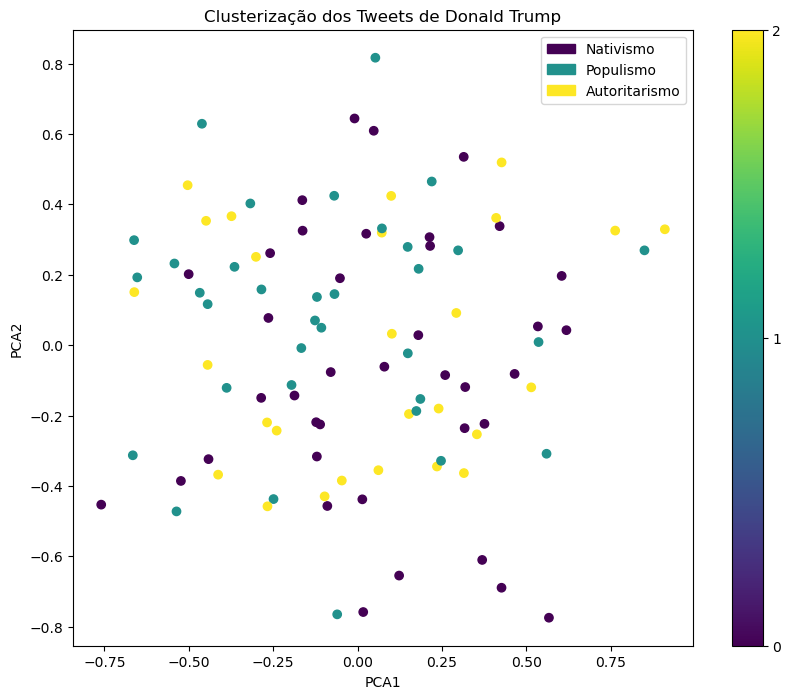

In [95]:
# Rótulos baseados em nativismo, populismo e autoritarismo
cluster_labels = {
    0: 'Nativismo',
    1: 'Populismo',
    2: 'Autoritarismo'
}

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tweets_df['PCA1'], tweets_df['PCA2'], c=tweets_df['Cluster'], cmap='viridis')

plt.title('Clusterização dos Tweets de Donald Trump')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(scatter, ticks=[0, 1, 2])
handles = []
for cluster, label in cluster_labels.items():
    handles.append(mpl.patches.Patch(color=scatter.cmap(cluster / (len(cluster_labels) - 1)), label=label))

plt.legend(handles=handles)

plt.show()